In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [78]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [10]:
columnname=['x','y']
dataset=pd.read_csv("ex1data1.txt",names=columnname)
print(dataset)
dataset.shape

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


(97, 2)

In [11]:
dataf=pd.DataFrame(dataset)
dataf.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [16]:
x_value=dataf.iloc[0:97,0:1]
x_value

,x
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [17]:
y_value=dataf.iloc[0:97,1:2]
y_value

,y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


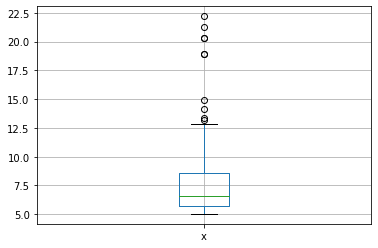

In [18]:
x_box=x_value.boxplot(column=['x'])

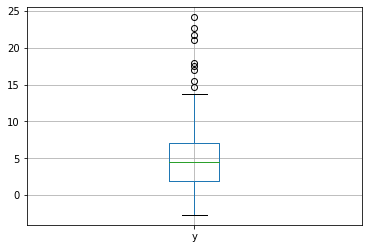

In [19]:
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, '1st LR scatter plot')

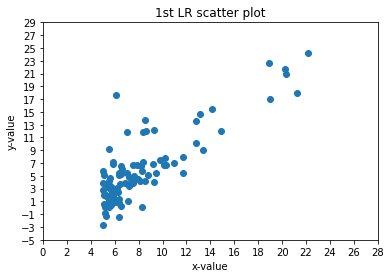

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(0,30,step=2))
plt.yticks(np.arange(-5,30,step=2))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR scatter plot")

Gradient Descent 

In [22]:
#define hypothesis
def hypothesis(theta_array,x):
  return theta_array[0] +theta_array[1]*x

In [23]:
#define cost function
def cost_function(theta_array,x,y,m): #x,y are list of observation
  total_error=0

  for i in range(m):
    total_error+=(theta_array[0]+theta_array[1]*x[i]-y[i])**2
  
  return total_error/(2*m)

In [24]:
def gradient_descent(theta_array,x,y,alpha,m):
  summation_0=0
  summation_1=0

  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=((theta_array[0]+theta_array[1]*x[i])-y[i])*x[i]
  
  new_theta_0=theta_array[0]-alpha*(summation_0)/m
  new_theta_1=theta_array[1]-alpha*(summation_1)/m

  updated_theta_array=[new_theta_0,new_theta_1]
  print(updated_theta_array)
  return updated_theta_array


In [64]:
def training(x,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_array=[theta_0,theta_1]
  
  m=x.size   #size of dataset
  cost_function_values=[]
  for i in range(iters):
    theta_array=gradient_descent(theta_array,x,y,alpha,m)

    cost_function_values.append(cost_function(theta_array,x,y,m))
    if(i%10==0):
      y_new=x*theta_array[1]+theta_array[0]
      plt.plot(x,y_new,'r')
      plt.scatter(x,y)
      plt.show()

  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iteration")
  plt.ylabel("cost/loss values")
  plt.title("Cost Function Curve")
  plt.show()
  print(theta_array)
  return theta_array

In [29]:
columnname=['x','y']
training_data=pd.read_csv("ex1data1.txt",names=columnname)
cleaning_dataset=training_data.dropna()    #it drops the observation for a
cleaning_dataset

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [46]:
x_train=cleaning_dataset['x']

In [47]:
y_train=cleaning_dataset['y']

In [50]:
x_value=x_train.values.reshape(x_train.size)
x_value

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [51]:
y_value=y_train.values.reshape(y_train.size)
y_value

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

Normal Equation

In [67]:
X = np.array([np.ones(len(x_value)), x_value]).T     #x0 and x1 features
Y = (y_value[:, np.newaxis])

In [68]:
theta_array = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)         #Normal Equation Formula and calculate the theta array
print(theta_array)

[[-3.89578088]
 [ 1.19303364]]


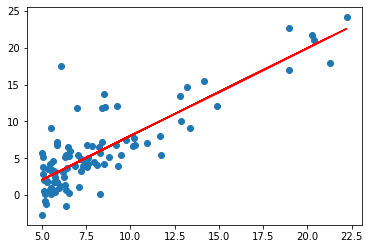

In [71]:
y_new = x_value*theta_array[1][0]+theta_array[0][0]
plt.plot(x_value,y_new,'r')
plt.scatter(x_value,y_value)
plt.show()

In [76]:
alpha=0.0125
iter=3000
final_theta=training(x_value,y_value,alpha,iter)

Output hidden; open in https://colab.research.google.com to view.

In [77]:
print(final_theta)#Gradient Descent
print(theta_array)#Normal Eqn

[-3.891206150131562, 1.1925740631226371]
[[-3.89578088]
 [ 1.19303364]]
